In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import astropy
from astropy import constants as ac
import lightkurve

In [2]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans - serif"
rcParams["font.sans-serif"] = ["Verdana"]
rcParams["text.usetex"] = True

### Reading in the spectra

In [3]:
pmsu = pd.read_csv('spectra/GJ1243_PMSU1.txt',delim_whitespace=True, skiprows=1,names=('wave_cal','flux_cal'))
#pmsu

,wave_cal,flux_cal
0,6171.8,1.793700e-14
1,6173.5,1.815600e-14
2,6175.3,1.757100e-14
3,6177.1,1.723700e-14
4,6178.8,1.689300e-14
...,...,...
794,7572.9,0.000000e+00
795,7574.7,0.000000e+00
796,7576.5,0.000000e+00
797,7578.2,0.000000e+00


In [4]:
pmsu_flux_cal = pmsu['flux_cal'].values *2

In [5]:
pmsu_wave = pmsu['wave_cal'].values

In [6]:
m4_template = pd.read_csv('spectra/m4_template.dat',delim_whitespace=True, skiprows=13,names=('wave','log_flux'))
#wavelength in microns
m4_template

,wave,log_flux
0,0.115000,-99.000000
1,0.115500,-99.000000
2,0.116000,-99.000000
3,0.116500,-99.000000
4,0.117000,-99.000000
...,...,...
44198,5.071754,3.107181
44199,5.072759,3.155765
44200,5.073764,3.144714
44201,5.074769,3.107299


In [7]:
m4_flux = 10** m4_template['log_flux'].values #removing log units 
m4_wave = m4_template['wave'].values * 10000 #converting units microns to Angstroms

### Calibrating the m4 template to the GJ 1243 spectrum

In [8]:
x1 = np.where((pmsu_wave >= 7200) & (pmsu_wave <= 7450))
x2 = np.where((m4_wave >= 7200) & (m4_wave <= 7450))
#print(x1)
#print(x2)

flux_convert = np.nanmedian(pmsu_flux_cal[x1]) / np.nanmedian(m4_flux[x2])
print(flux_convert)

1.8025093969689897e-18


In [104]:
flux_mask = (np.where(pmsu_wave < 7500))

Text(0, 0.5, 'Flux[erg $s^{-1} cm^{-2}A^{-1}$]')

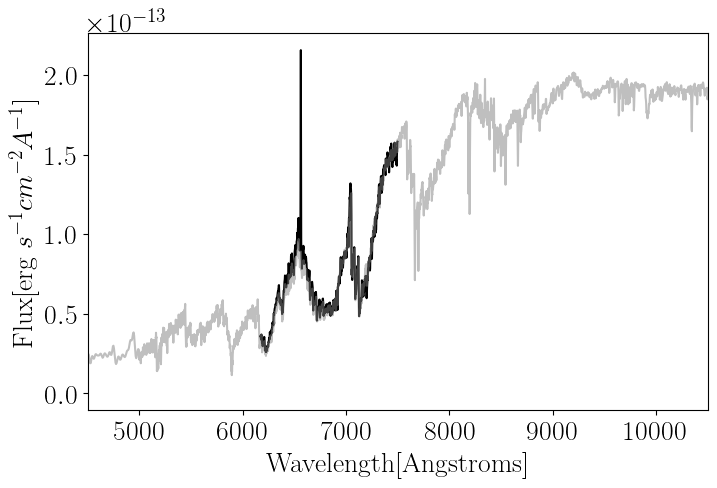

In [106]:
plt.plot(pmsu_wave[flux_mask],pmsu_flux_cal[flux_mask],color='k')
plt.plot(m4_wave,m4_flux*flux_convert,color='grey',alpha=.5)
plt.xlim(4500,10500)
plt.xlabel('Wavelength[Angstroms]')
plt.ylabel('Flux[erg $s^{-1} cm^{-2}A^{-1}$]')

### Reading in the TESS + Kepler filter curves

In [10]:
tess_filter = pd.read_csv('spectra/tess-response-function-v1.0.csv',names=('wave','l_transmission'),skiprows=8,delimiter=',') #wavelength in nm
kepler_filter = pd.read_csv('spectra/kepler_response_hires1.txt',names=('wave','l_transmission'),skiprows=9,delim_whitespace=True,) #wavelength in nm

In [12]:
#(tess_filter['wave'].values) 

In [13]:
# Adjusting units

tessfk_wave = tess_filter['wave'].values * 10
tessfk_tm = tess_filter['l_transmission'].values 
tess_tm_norm = tess_filter['l_transmission'].values/np.max(tess_filter['l_transmission'].values)

kepfk_wave = kepler_filter['wave'].values * 10
kepfk_tm = kepler_filter['l_transmission'].values
kep_tm_norm = kepler_filter['l_transmission'].values/np.max(kepler_filter['l_transmission'].values)

In [14]:
print((kep_tm_norm*np.max(pmsu_flux_cal))[10])
print((tessfk_tm*np.max(pmsu_flux_cal))[10])

1.7277561379310343e-16
8.456617647058771e-15


In [15]:
print(tessfk_wave[1])

4637.702503681885


In [123]:
tessfk_tm*np.max(pmsu_flux_cal)/np.nanmedian(tessfk_tm*np.max(pmsu_flux_cal))-1

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -0.99492901, -0.98884381, -0.97667343,
       -0.96450304, -0.94320487, -0.92494929, -0.90060852, -0.87322515,
       -0.84279919, -0.80933063, -0.76673428, -0.71805274, -0.62373225,
       -0.68154158, -0.57809331, -0.50811359, -0.4168357 , -0.36511156,
       -0.30425963, -0.25557809, -0.18255578, -0.07910751,  0.00608519,
        0.07606491,  0.15212982,  0.22819473,  0.2494929 ,  0.2525355 ,
        0.25557809,  0.26166329,  0.26166329,  0.26470588,  0.26470588,
        0.27079108,  0.27383367,  0.27383367,  0.27991886,  0.27991886,
        0.27991886,  0.28600406,  0.28600406,  0.28904665,  0.29208925,
        0.29513185,  0.30121704,  0.30121704,  0.30121704,  0.30425963,
        0.31034483,  0.31338742,  0.31643002,  0.31643002,  0.31643002,
        0.31947262,  0.31947262,  0.32251521,  0.31947262,  0.31947262,
        0.32555781,  0.32860041,  0.331643  ,  0.33772819,  0.34

Text(0, 0.5, 'Flux')

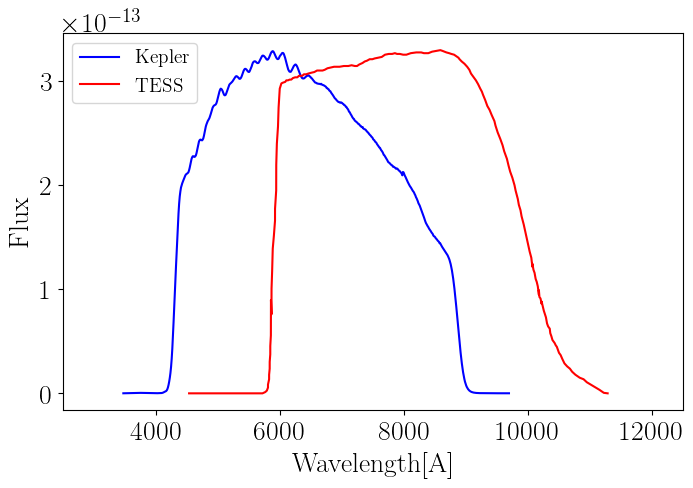

In [124]:
plt.plot(kepfk_wave,kep_tm_norm*np.max(pmsu_flux_cal),color='blue',label='Kepler')
plt.plot(tessfk_wave,tessfk_tm*np.max(pmsu_flux_cal),color='red',label='TESS')
plt.xlim(2500,12500)
plt.legend(loc='upper left',fontsize=14)
plt.xlabel('Wavelength[A]')
plt.ylabel('Flux')

### Now we clip the spectrum to match the filter wavelength range

In [17]:
clipk = np.where((m4_wave >= np.min(kepfk_wave)) & (m4_wave <= np.max(kepfk_wave)))

m4_wave_klim = m4_wave[clipk]
m4_flux_klim = m4_flux[clipk] * flux_convert

In [18]:
print((clipk))
print(m4_wave)
print(np.max(kepfk_wave))
print(max(kepfk_wave))

(array([  467,   468,   469, ..., 38176, 38177, 38178]),)
[ 1150.     1155.     1160.    ... 50737.638 50747.69  50757.751]
9700
9700


In [ ]:
#print(m4_wave)
#print(m4_flux)
#print(m4_wave[clipk])
#print(flux_convert)
print(m4_flux[clipk])

In [19]:
clipt = np.where((m4_wave >= np.min(tessfk_wave))&(m4_wave <= np.max(tessfk_wave)))

m4_wave_tlim = m4_wave[clipt]
m4_flux_tlim = m4_flux[clipt] * flux_convert

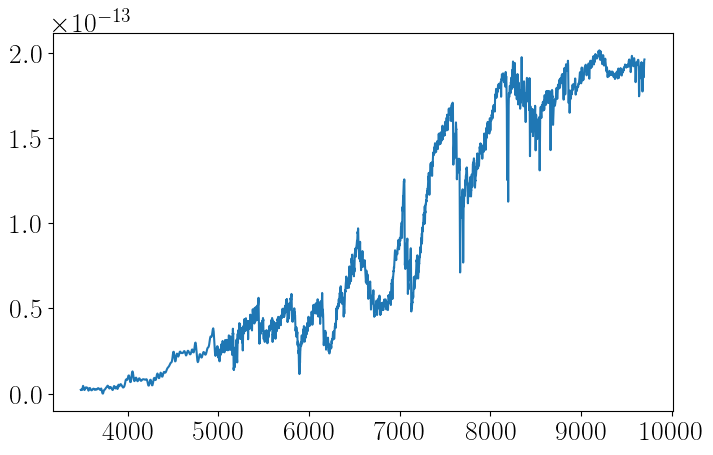

In [22]:
plt.plot(m4_wave_klim,m4_flux_klim)
#plt.plot(m4_wave_tlim,m4_flux_tlim)

### Resampling the filter on to spectrum wavelength grid

In [28]:
print(len(tessfk_wave))
print(len(tessfk_tm))
print(len(m4_wave_tlim))

179
179
38084


In [79]:

tm_tess = np.interp(m4_wave_tlim,tessfk_wave,tessfk_tm)
tm_kep = np.interp(m4_wave_klim,kepfk_wave,kep_tm_norm)

x50t = np.where(tm_tess >= max(tm_tess)/2.)
FWHM_t = max(tm_tess[x50t]) - min(tm_tess[x50t]) # in Angstroms

x50k = np.where(tm_kep >= max(tm_kep)/2.)
FWHM_k = max(tm_kep[x50k]) - min(tm_kep[x50k]) # in Angstroms


plx = 83.4814  # where did Jim get this parallax value?Gaia DR2 slightly different from what's on simbad 83.4940 
plx_err = 0.0366
dist = (1000. / plx) * u.pc

print('Distance (pc) = ',dist )


Distance (pc) =  11.978716217025589 pc


In [80]:
1000. / plx * u.pc

<Quantity 11.97871622 pc>

In [51]:
m4_wave_tlim

array([ 4545.   ,  4550.   ,  4555.   , ..., 11283.979, 11287.24 ,
       11290.489])

In [84]:
np.log10(np.trapz(m4_flux_tlim * tm_tess, x=m4_wave_tlim)* (2. * np.pi * dist.to('cm').value**2))

30.653468540772803

In [82]:
m4_wave_tlim

array([ 4545.   ,  4550.   ,  4555.   , ..., 11283.979, 11287.24 ,
       11290.489])

### Convolve spectrum with filter & Calculate luminosity

In [85]:
tess_lum = np.log10(np.trapz(m4_flux_tlim * tm_tess, x=m4_wave_tlim)* (2. * np.pi * dist.to('cm').value**2))

kep_lum = np.log10(np.trapz(m4_flux_klim * tm_kep, x=m4_wave_klim)* (2. * np.pi * dist.to('cm').value**2))

print('log Luminosity TESS = ',tess_lum)
print('log Luminosity KEPLER = ', kep_lum)


log Luminosity TESS =  30.653468540772803
log Luminosity KEPLER =  30.354766144311125


In [55]:
from astropy.modeling.models import BlackBody
from astropy import units as u

bb = BlackBody(temperature=10000*u.K)

In [57]:
bb10_tess = bb(m4_wave_tlim)
bb10_kep = bb(m4_wave_klim)

print( 'BB_TESS / BB_Kep', np.sum(bb10_tess) / np.sum(bb10_kep))


BB_TESS / BB_Kep 1.033513542159019


In [72]:
#plt.plot(bb10_kep,m4_flux_klim)
#plt.plot(bb10_tess,m4_flux_tlim)

Text(0, 0.5, ' Flux[$10^{-13}$ erg $s^{-1} cm^{-2}A^{-1}$]')

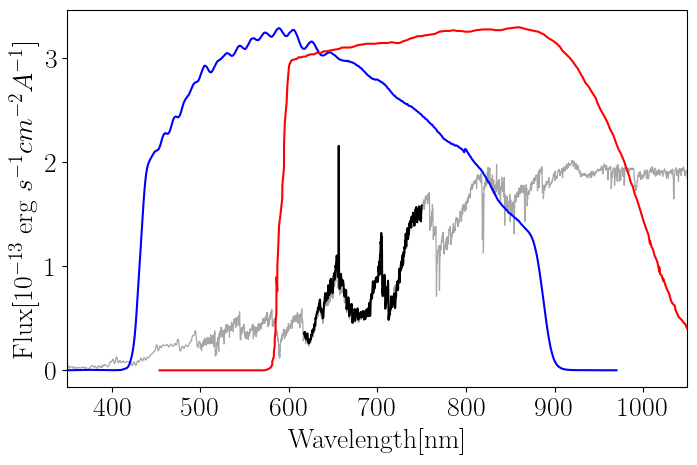

In [118]:
plt.plot(m4_wave/10,m4_flux*flux_convert/1e-13,color='grey',alpha=.7,linewidth=.9)
plt.plot(pmsu_wave[flux_mask]/10,pmsu_flux_cal[flux_mask]/1e-13,color='k')

plt.plot(kepfk_wave/10,kep_tm_norm*np.max(pmsu_flux_cal)/1e-13,color='blue',label='Kepler')
plt.plot(tessfk_wave/10,tessfk_tm*np.max(pmsu_flux_cal)/1e-13,color='red',label='TESS')

plt.xlim(350,1050)
plt.xlabel('Wavelength[nm]')
plt.ylabel(' Flux[$10^{-13}$ erg $s^{-1} cm^{-2}A^{-1}$]')